## Interpolation
Interpolation problem : for a given set of n data point {(xi, yi)}pow(n), find a function f(x)  
such that f(xi) = yi, for i element of [1,n]. f is known as interpolant.  
Typically we can write the interpolant as a linear combination of some basis functions phi_j(x),  
such that f(x) = sum(cj*phi_j(x))

In [1]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

### Polynomials
ith element is the coefficient of xi. 1 + 2x + 3x2 is [1, 2, 3] in polynomial  
We have general known polynom icluded in this class as *Chebyshev* and *Legendre* 

In [2]:
x = np.array([1,2,3,4])
y = np.array([1,3,5,4])
# approximate this function by 
# f(x) = sum(ci*phi_i(x)) i=[0,4]

deg = len(x) - 1
A = P.polynomial.polyvander(x, deg)
c = linalg.solve(A, y)
f1 = P.Polynomial(c)
f1(2.5)

4.1875

The sought coefficient vector is [2, -3.5, 3, -0.5] and the interpolation polynomial is thus  
f(x) = cxi, i in [0,1,2,3]

To perform this polynomial interpolation in another polynomial basis, all that  
we need to change is the name of function that was used to generate the Vandermonde matrix A.

In [3]:
A = P.chebyshev.chebvander(x, deg)
c = linalg.solve(A, y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

Interpolation polynomial in Chebychev basis is different from the previous one.  
However, regardless of the polynomial basis, the interpolation polynomial is unique

In [4]:
f2 = P.Chebyshev(c)
f2(2.5)

4.1875

We can demonstrate that the interpolation with the two bases indeed results in the same interpolation function by plotting f1 and f2

Each polynomial class provides a mehtod *fit*, that can be used to interpolate.

In [5]:
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [6]:
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

Make in evidence the usefulness of *spline interpolation* by interpolating Runge's function with  
Polynomial, Chebychev ans Spline interpolation as done in p 176..178

In [7]:
def runge(x):
    return 1/(1 + 25 * x**2)
def runge_interpolate(n):
    x = np.linspace(-1,1,n)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

/Users/karamoko/miniconda3/envs/formations/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


Text(0.5, 0, '$x$')

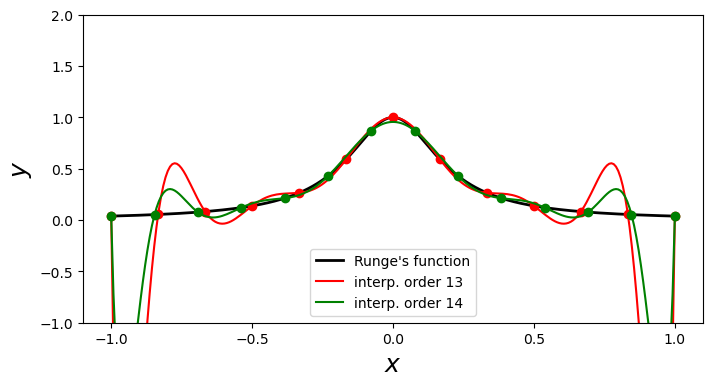

In [8]:
xx = np.linspace(-1, 1, 250)
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")
# 13th order interpolation of the Runge function
n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d'%n)
# 14th order interpolation of the Runge function
n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d'%n)
ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)


## Spline Interpolation

Text(0.5, 0, '$x$')

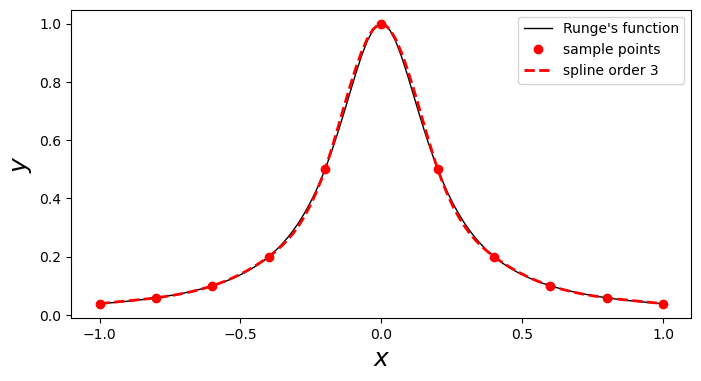

In [9]:
x = np.linspace(-1, 1, 11)
y = runge(x)
f_i = interpolate.interp1d(x, y, kind=3)

xx = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f_i(xx), 'r--', lw=2, label='spline order 3')
ax.legend()
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

## Multivariate Interpolation

In [26]:
x = y = np.linspace(-2, 2, 10)
def f(x, y):
    return np.exp(-(x + .5)**2 - 2*(y + .5)**2) - np.exp(-(x - .5)**2 - 2*(y - 0.5)**2)
# We evaluate the function at the sample points and add the random noise to simulate uncertain measurements

X, Y = np.meshgrid(x, y)
Z = f(X, Y) + 0.05*np.random.randn(*X.shape)
# Z is matrix of data points with noisy data, which is exactly known and regularly spaced coordinates x and y
f_i = interpolate.RectBivariateSpline(x, y, Z)
# f_i behaves as a function and can be evaluated at arbitrary x and y

Next is a supersampling of the original data, using interpolation function

In [21]:
xx = yy = np.linspace(x.min(), x.max(), 100)
ZZi = f_i(xx, yy)
XX, YY = np.meshgrid(xx, yy)
# Here XX and YY are coordinate matrices for the supersampled points, and the corresponding interpolated values are ZZi

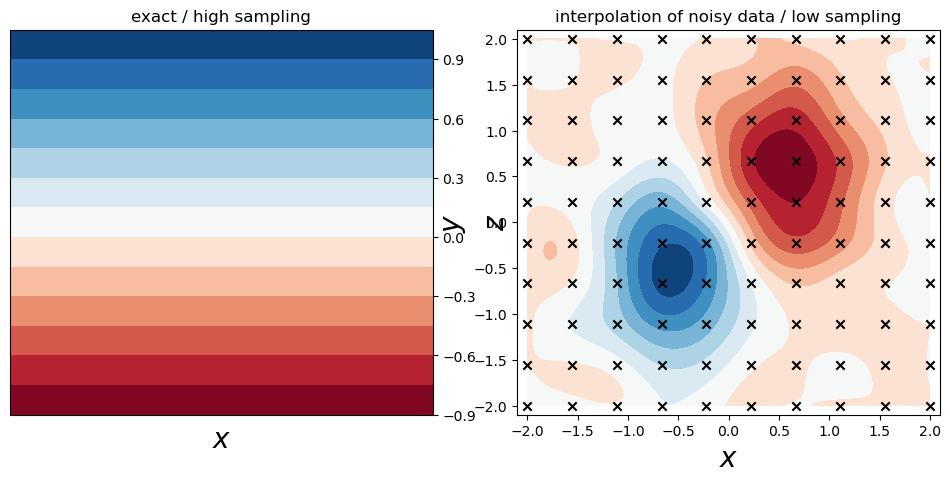

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# contour of exact function
c = axes[0].contourf(XX, YY, f(XX,YY), 15, cmap=plt.cm.RdBu)
axes[0].set_ylim(-2.1, 2.1)
axes[0].set_xlim(-2.1, 2.1)
axes[0].set_xlabel(r'$x$', fontsize=20)
axes[0].set_ylabel(r'$y$', fontsize=20)
# axes[0].scatter(X, Y, marker='x', color='k')
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, axes[0])
cb.set_label(r"$z$", fontsize=20)
# contours of supersampled interpolation of noisy data
c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r'$x$', fontsize=20)
axes[1].set_ylabel(r'$y$', fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, axes[0])
cb.set_label(r"$z$", fontsize=20)

With relatively sparsely spaced data points, we can thus construct an approximation by using `interpolation.RectBivariateSpline`.  
This gives a smoothed approximation for the underplaying function, which is frequently useful when dealing with data obtained from measurements or  
computations that are costly in time or other resources.